In [1]:
from selenium import webdriver
import pandas as pd
from IPython.display import display
from PIL import Image
import requests
from io import BytesIO


In [2]:
fawzy = webdriver.Chrome()

In [3]:
fawzy.get("https://www.amazon.eg/s?i=electronics&rh=n%3A21832883031&s=popularity-rank&fs=true&language=en&ref=lp_21832883031_sar")

In [4]:
product_name = fawzy.find_elements("xpath","//*/div/div/span/div/div/div/div/a/h2/span")
name = [item.text.strip() for item in product_name]
name

['Samsung Galaxy A55 5G, Android Smartphone, Dual SIM Mobile Phone, 8GB RAM, 128GB Storage, Awesome Iceblue -1 Year Warranty/Local Version',
 'Nokia 106 TA-1564 DS NENA1 Dual SIM 48MB Ram+128MB ROM (1.8 Inches) (2G) - (Charcoal)',
 'Xiaomi Redmi Note 14 Smartphone, 8 + 256 GB, Black, 108 MP AI Camera System, 5500 mAh Battery, 120 Hz Eye Protection Display, AI Functions | 18 Month manufacturer warranty',
 'Samsung Galaxy A16 LTE, Android Smartphone, Dual SIM Mobile Phone, 6GB RAM, 128GB Storage, Black (1 Year Local Warranty)',
 'Samsung Galaxy A06 Dual Sim 6GB RAM 128GB Storage Android Smartphone, 6.7-Inch Screen Size, Light Blue- 1 Year Warranty/Local Version',
 'Infinix Smart 9 (RAM: 3+3GB, ROM: 64GB), 6.7" HD+ Display, 13MP Dual AI Rear Camera With Flashlight, 8MP Front Camera, 5000 mAh Battery, Dual Nano Sim, Type-C, Android 14 - Metallic Black',
 'Infinix Smart 9 (RAM: 4+4GB, ROM: 128GB), 6.7 inch HD+Screen, 13MP AI Dual Back Camera, 8MP Front Camera, 5000mAh Battery, Dual Nano SIM

In [5]:
product_price = fawzy.find_elements("xpath","//*/div/div/div/div/span/div/div/div/div/div/div/a/span/span/span[2]")
price = [item.text.strip() for item in product_price]
price

['20,199',
 '750',
 '9,999',
 '7,499',
 '5,962',
 '4,299',
 '4,799',
 '6,399',
 '18,637',
 '4,299',
 '4,748',
 '4,197',
 '6,249',
 '18,499',
 '945',
 '8,360',
 '3,939',
 '3,699',
 '5,442',
 '9,999',
 '6,337',
 '67,750',
 '4,998',
 '14,600',
 '18,499',
 '200',
 '250']

['https://m.media-amazon.com/images/I/61V7NjE8V+L._AC_UL320_.jpg', 'https://m.media-amazon.com/images/I/513fG2LYvIL._AC_UL320_.jpg', 'https://m.media-amazon.com/images/I/61Lp1UcxeLL._AC_UL320_.jpg', 'https://m.media-amazon.com/images/I/61asGlxdMOL._AC_UL320_.jpg', 'https://m.media-amazon.com/images/I/61CyH0JWv9L._AC_UL320_.jpg', 'https://m.media-amazon.com/images/I/51SdHZMOFsL._AC_UL320_.jpg', 'https://m.media-amazon.com/images/I/51EhoXkyKcL._AC_UL320_.jpg', 'https://m.media-amazon.com/images/I/41zRa5f6IxL._AC_UL320_.jpg', 'https://m.media-amazon.com/images/I/51mIxR9tPZL._AC_UL320_.jpg', 'https://m.media-amazon.com/images/I/61CyH0JWv9L._AC_UL320_.jpg', 'https://m.media-amazon.com/images/I/51SdHZMOFsL._AC_UL320_.jpg', 'https://m.media-amazon.com/images/I/616us5sNKiL._AC_UL320_.jpg', 'https://m.media-amazon.com/images/I/71+d4rChCCL._AC_UL320_.jpg', 'https://m.media-amazon.com/images/I/61ibfqfxU1L._AC_UL320_.jpg', 'https://m.media-amazon.com/images/I/51u48GTOFOL._AC_UL320_.jpg', 'https://

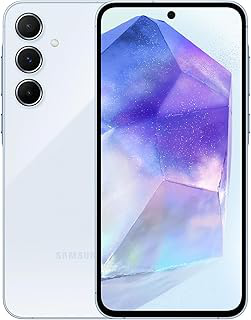

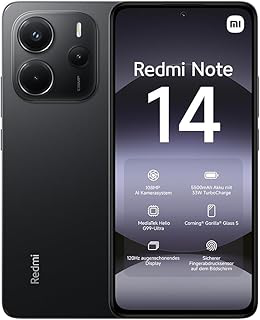

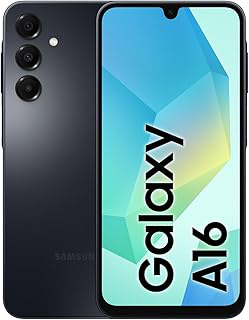

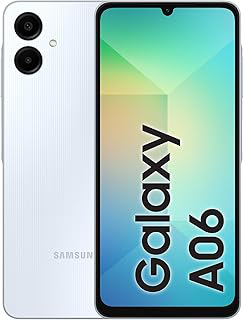

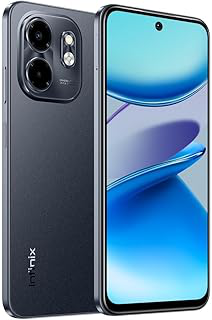

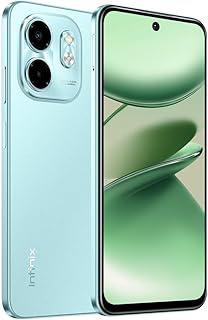

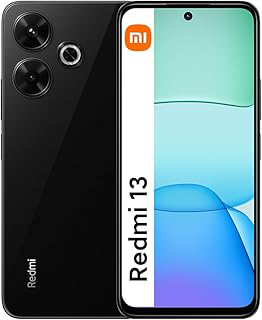

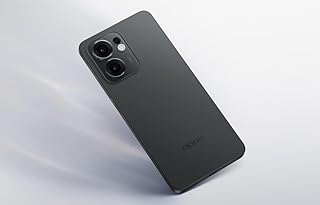

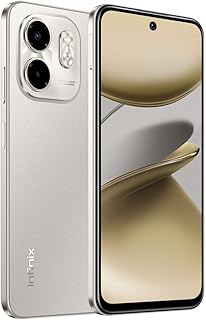

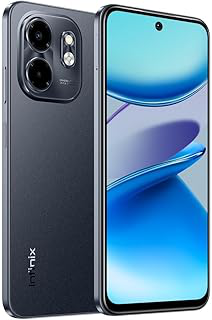

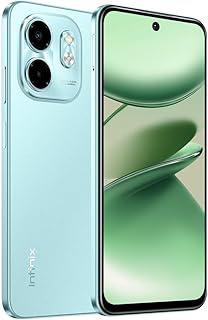

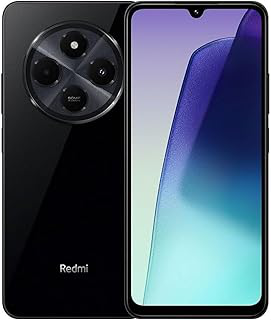

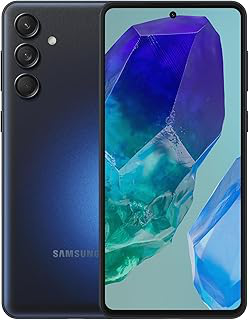

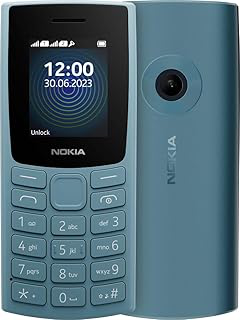

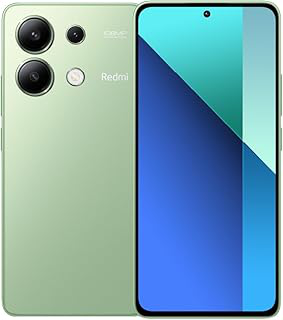

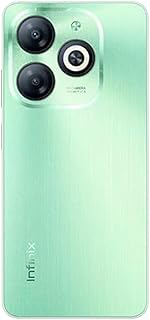

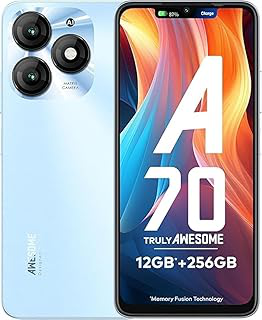

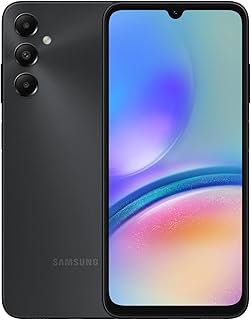

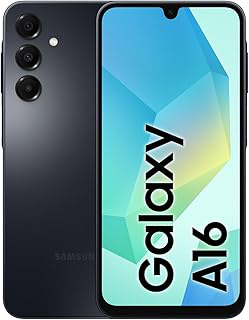

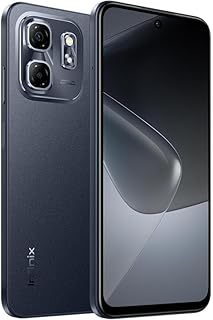

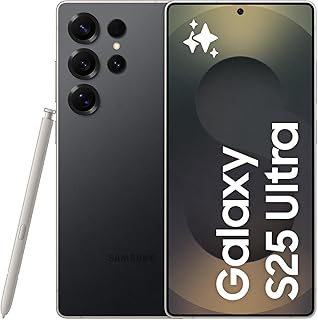

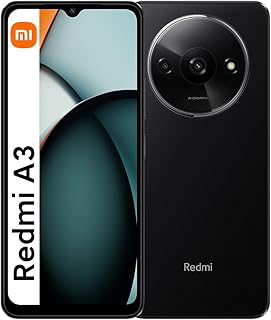

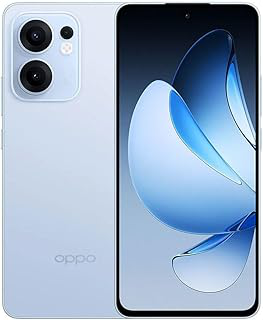

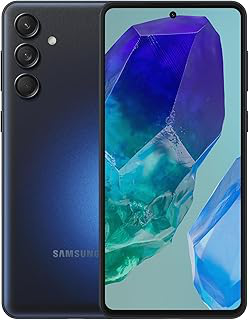

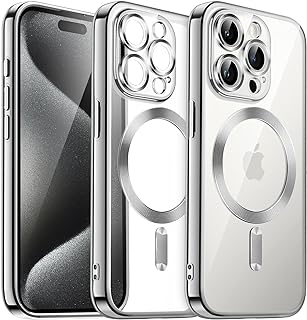

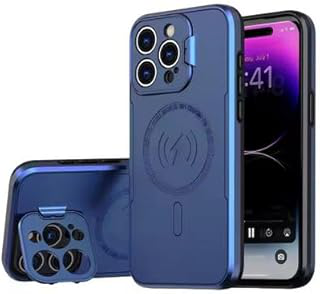

In [6]:
product_img = fawzy.find_elements("xpath","//*/div/div/span/div/div/div[1]/span/a/div/img")
img_urls = [item.get_attribute("src") for item in product_img]
print(img_urls)
for url in img_urls:
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    display(img)

In [7]:
rating = fawzy.find_elements('xpath', "//*/div/div/span/div/div/div/div/div/span/a/i[1]")
rating=list(map(lambda el: el.get_attribute("innerText").strip(), rating))
rating

['3.9 out of 5 stars',
 '3.9 out of 5 stars',
 '4.4 out of 5 stars',
 '3.9 out of 5 stars',
 '3.9 out of 5 stars',
 '4.8 out of 5 stars',
 '3.7 out of 5 stars',
 '4.0 out of 5 stars',
 '1.0 out of 5 stars',
 '3.9 out of 5 stars',
 '4.2 out of 5 stars',
 '5.0 out of 5 stars',
 '3.7 out of 5 stars',
 '2.2 out of 5 stars',
 '3.8 out of 5 stars',
 '4.0 out of 5 stars',
 '4.2 out of 5 stars',
 '4.3 out of 5 stars',
 '4.3 out of 5 stars',
 '4.5 out of 5 stars',
 '5.0 out of 5 stars',
 '3.5 out of 5 stars',
 '2.2 out of 5 stars',
 '3.7 out of 5 stars']

In [8]:
max_len = max(len(name), len(price), len(img_urls))
name += [None] * (max_len - len(name))
price += [None] * (max_len - len(price))
img_urls += [None] * (max_len - len(img_urls))
rating += [None] * (max_len - len(rating))

In [9]:
df = pd.DataFrame({
    "Title": name,
    "Price": price,
    "Image": img_urls,
    "Rating": rating
})

In [10]:
df

,Title,Price,Image,Rating
0,"Samsung Galaxy A55 5G, Android Smartphone, Dua...","20,199",https://m.media-amazon.com/images/I/61V7NjE8V+...,3.9 out of 5 stars
1,Nokia 106 TA-1564 DS NENA1 Dual SIM 48MB Ram+1...,750,https://m.media-amazon.com/images/I/513fG2LYvI...,3.9 out of 5 stars
2,"Xiaomi Redmi Note 14 Smartphone, 8 + 256 GB, B...","9,999",https://m.media-amazon.com/images/I/61Lp1UcxeL...,4.4 out of 5 stars
3,"Samsung Galaxy A16 LTE, Android Smartphone, Du...","7,499",https://m.media-amazon.com/images/I/61asGlxdMO...,3.9 out of 5 stars
4,Samsung Galaxy A06 Dual Sim 6GB RAM 128GB Stor...,"5,962",https://m.media-amazon.com/images/I/61CyH0JWv9...,3.9 out of 5 stars
5,"Infinix Smart 9 (RAM: 3+3GB, ROM: 64GB), 6.7"" ...","4,299",https://m.media-amazon.com/images/I/51SdHZMOFs...,4.8 out of 5 stars
6,"Infinix Smart 9 (RAM: 4+4GB, ROM: 128GB), 6.7 ...","4,799",https://m.media-amazon.com/images/I/51EhoXkyKc...,3.7 out of 5 stars
7,"Redmi 13 Mobile, Midnight Black (6GB Ram+128GB...","6,399",https://m.media-amazon.com/images/I/41zRa5f6Ix...,4.0 out of 5 stars
8,Oppo Reno 13F 5G Dual Sim Cell Phone With 256G...,"18,637",https://m.media-amazon.com/images/I/51mIxR9tPZ...,1.0 out of 5 stars
9,"Infinix Smart 9 (RAM: 3+3GB, ROM: 64GB), 6.7"" ...","4,299",https://m.media-amazon.com/images/I/61CyH0JWv9...,3.9 out of 5 stars


In [11]:
df.dropna(inplace=True)

In [12]:
df

,Title,Price,Image,Rating
0,"Samsung Galaxy A55 5G, Android Smartphone, Dua...","20,199",https://m.media-amazon.com/images/I/61V7NjE8V+...,3.9 out of 5 stars
1,Nokia 106 TA-1564 DS NENA1 Dual SIM 48MB Ram+1...,750,https://m.media-amazon.com/images/I/513fG2LYvI...,3.9 out of 5 stars
2,"Xiaomi Redmi Note 14 Smartphone, 8 + 256 GB, B...","9,999",https://m.media-amazon.com/images/I/61Lp1UcxeL...,4.4 out of 5 stars
3,"Samsung Galaxy A16 LTE, Android Smartphone, Du...","7,499",https://m.media-amazon.com/images/I/61asGlxdMO...,3.9 out of 5 stars
4,Samsung Galaxy A06 Dual Sim 6GB RAM 128GB Stor...,"5,962",https://m.media-amazon.com/images/I/61CyH0JWv9...,3.9 out of 5 stars
5,"Infinix Smart 9 (RAM: 3+3GB, ROM: 64GB), 6.7"" ...","4,299",https://m.media-amazon.com/images/I/51SdHZMOFs...,4.8 out of 5 stars
6,"Infinix Smart 9 (RAM: 4+4GB, ROM: 128GB), 6.7 ...","4,799",https://m.media-amazon.com/images/I/51EhoXkyKc...,3.7 out of 5 stars
7,"Redmi 13 Mobile, Midnight Black (6GB Ram+128GB...","6,399",https://m.media-amazon.com/images/I/41zRa5f6Ix...,4.0 out of 5 stars
8,Oppo Reno 13F 5G Dual Sim Cell Phone With 256G...,"18,637",https://m.media-amazon.com/images/I/51mIxR9tPZ...,1.0 out of 5 stars
9,"Infinix Smart 9 (RAM: 3+3GB, ROM: 64GB), 6.7"" ...","4,299",https://m.media-amazon.com/images/I/61CyH0JWv9...,3.9 out of 5 stars
